# Ploting  Speedtest Results

In [1]:
import os
import re
import json

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import custom_module as M

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
# get master dict and convert to wide & long dfs
_dict = M.gather_dicts()
df_wide = pd.DataFrame.from_dict(_dict)
df_long = df_wide.T
df_long.index = range(len(df_long))
df_long.head()

,test,day,location,computer,router_location,data
0,1,2020-06-07,living room,HP ProBook 450 G5,living room west corner,"{'time': ['12:03:59', '12:07:13', '12:11:15', ..."
1,2,2020-06-07,upper east,HP ProBook 450 G5,living room west corner,"{'time': ['12:46:26', '12:50:20', '12:52:20', ..."
2,3,2020-06-07,lower west,HP ProBook 450 G5,living room west corner,"{'time': ['13:31:28', '13:35:30', '13:38:15', ..."
3,4,2020-06-07,upper west,HP ProBook 450 G5,living room west corner,"{'time': ['14:09:46', '14:11:36', '14:16:51', ..."
4,5,2020-06-08,upper east,HP ProBook 450 G5,living room west corner,"{'time': ['16:26:02', '16:28:46', '16:32:11', ..."


The data is a dictionary of times in seconds and download and upload speeds in Mbps (I did not collect jitter and latency until later so I'll ignore those).

In [3]:
print(df_long.loc[0,'data'])

{'time': ['12:03:59', '12:07:13', '12:11:15', '12:15:19', '12:19:53', '12:24:15', '12:25:55', '12:27:09', '12:29:03', '12:34:15'], 'download': [99.75158, 69.165935, 82.09726, 76.162253, 49.996191, 80.555113, 132.313207, 118.668693, 97.323495, 88.024754], 'upload': [4.588742, 5.515696, 3.592372, 6.51109, 4.993106, 5.375524, 4.940173, 5.650967, 5.672564, 6.971582]}


We can visualize this for a single test in all its glory - but this is too zoomed in for overall insights given how our speeds vary per day, time of day, router location, and computer used:

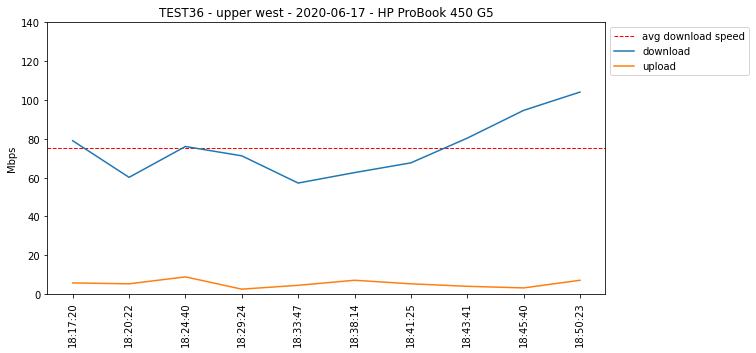

In [4]:
M.plot_single(df_wide, 'test36');

## Dates

Focusing on download speeds since that's most of our use case at home, I look at variance in download times given different dates:

In [5]:
date_df = M.transform_data(df_wide, "day")
date_df.iloc[:,:10]

,2020-06-07,2020-06-07,2020-06-07,2020-06-07,2020-06-08,2020-06-09,2020-06-10,2020-06-10,2020-06-10,2020-06-10
0,99.751580,41.039935,93.493913,66.902935,32.044196,66.419107,122.409275,24.492825,31.211880,32.814672
1,69.165935,47.908396,67.554907,109.046060,14.903680,61.665326,107.105495,29.259755,32.348858,18.641280
2,82.097260,41.205536,77.519773,75.464375,41.233320,37.660307,34.099353,46.525715,39.120474,14.031744
3,76.162253,49.155870,104.369230,80.596316,22.511722,55.285879,65.111738,37.090685,21.847185,15.798649
4,49.996191,70.795400,59.548327,56.638547,24.779011,11.976199,119.922186,66.819126,49.677905,40.156984
5,80.555113,25.725200,125.089836,85.813226,27.821760,12.257830,61.931694,32.642292,36.459608,48.074930
6,132.313207,50.335698,57.063406,107.269454,15.754265,44.757760,48.782933,70.483728,45.251242,23.157007
7,118.668693,33.906345,102.293335,92.528915,39.562590,54.784480,66.499452,43.154635,48.388661,49.213574
8,97.323495,61.458700,33.933635,89.636640,42.674279,20.726856,63.223840,75.289383,32.906248,55.514818
9,88.024754,48.716588,105.148166,121.669805,44.402936,30.362494,104.535887,24.037394,56.697534,35.752466


Since it's hard to get a sense by looking at numbers, we can plot a __heatmap__:

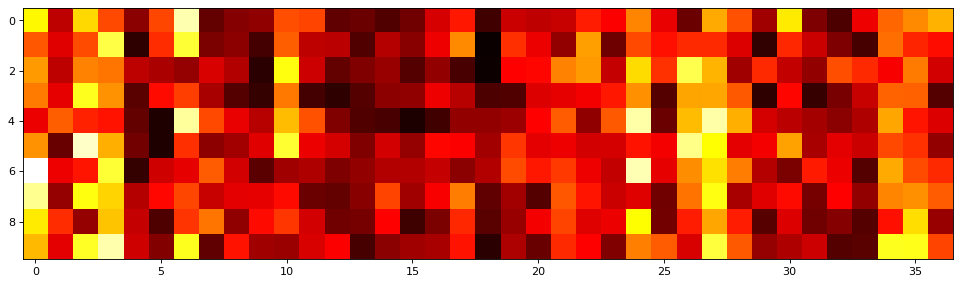

In [6]:
fig=plt.figure(figsize=(15, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.imshow(date_df, cmap='hot', interpolation='nearest')
plt.show()

There's a lot of variation but we can see how some tests result in lower speeds and others in higher speeds by looking at the vertical bands. The first few tests had unusually high speeds but eventually we get streaks of low speeds. 

Another way to visualize this would be __boxplots__ to show the variation `within` and `in-between` tests:

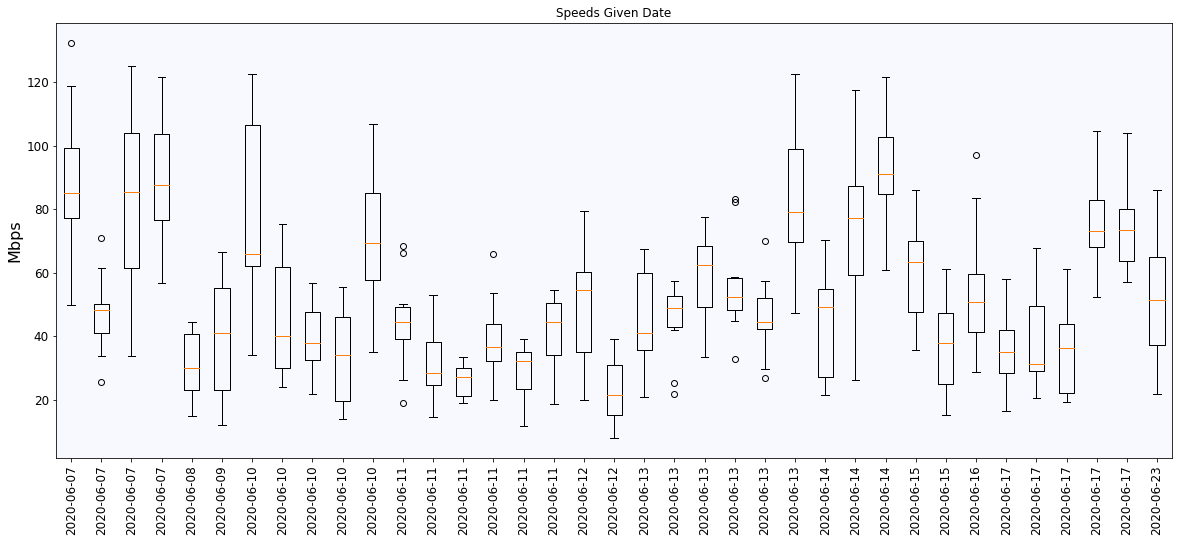

In [7]:
M.plot_results(date_df, "Date")

## Laptop location

The laptop's location matters but so does the location of the router during a given test, and another confounder is the laptop used.

Since my data collection strategy was evolving and less than optimal, stratification leads to incomplete sample sizes. A large subsample comes from the "upper east" room:

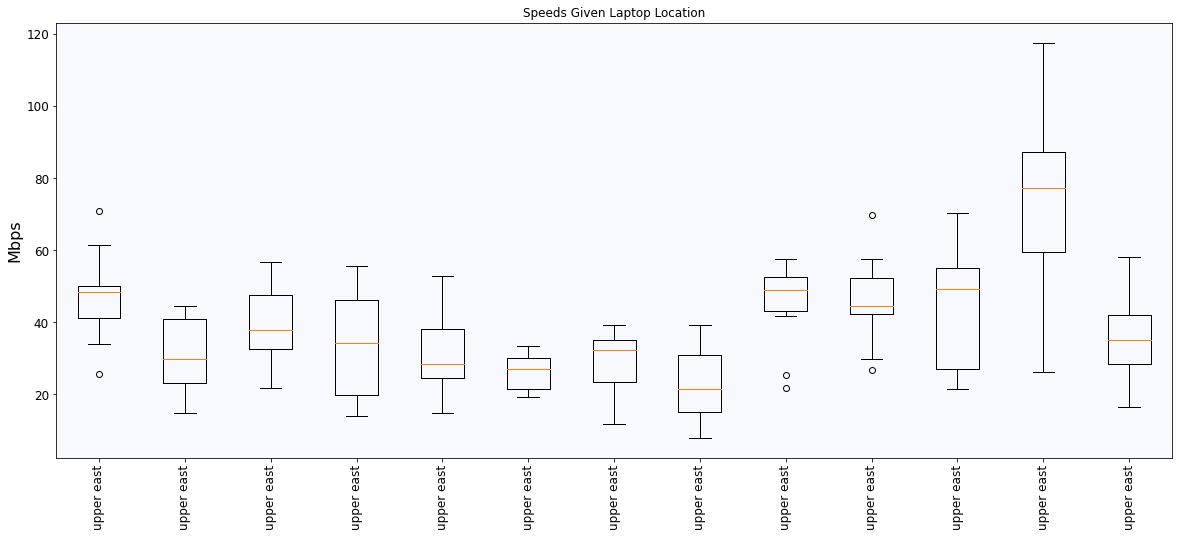

In [8]:
loc_df = M.transform_data(df_wide, 'location')
M.plot_results(loc_df[['upper east']], "Laptop Location")

However, I moved the router to the hallway upstairs for the last four tests - and it also just so happened that I used the old Dell (Inspiron 13-5378) more so I expected a boost in speed from the router shift and a decrease in speed from using the old laptop. Notice how the best result comes from using the new Dell laptop:

In [9]:
df_long[df_long['location']=='upper east']

,test,day,location,computer,router_location,data
1,2,2020-06-07,upper east,HP ProBook 450 G5,living room west corner,"{'time': ['12:46:26', '12:50:20', '12:52:20', ..."
4,5,2020-06-08,upper east,HP ProBook 450 G5,living room west corner,"{'time': ['16:26:02', '16:28:46', '16:32:11', ..."
8,9,2020-06-10,upper east,HP ProBook 4530s,living room west corner,"{'time': ['13:20:36', '13:25:25', '13:26:01', ..."
9,10,2020-06-10,upper east,HP ProBook 4530s,living room west corner,"{'time': ['16:29:26', '16:32:21', '16:34:55', ..."
12,13,2020-06-11,upper east,Inspiron 13-5378,living room west corner,"{'time': ['11:16:49', '11:20:01', '11:20:54', ..."
13,14,2020-06-11,upper east,Inspiron 13-5378,living room west corner,"{'time': ['14:32:27', '14:32:51', '14:37:59', ..."
15,16,2020-06-11,upper east,HP ProBook 4530s,living room west corner,"{'time': ['20:40:05', '20:41:36', '20:46:18', ..."
18,19,2020-06-12,upper east,Inspiron 13-5378,living room west corner,"{'time': ['20:43:00', '20:43:26', '20:45:09', ..."
20,21,2020-06-13,upper east,HP ProBook 450 G5,living room west corner,"{'time': ['12:58:07', '12:58:36', '13:03:25', ..."
23,24,2020-06-13,upper east,Inspiron 13-5378,hallway upstairs,"{'time': ['19:12:06', '19:13:22', '19:14:48', ..."


Here I compare upper west and lower west locations:

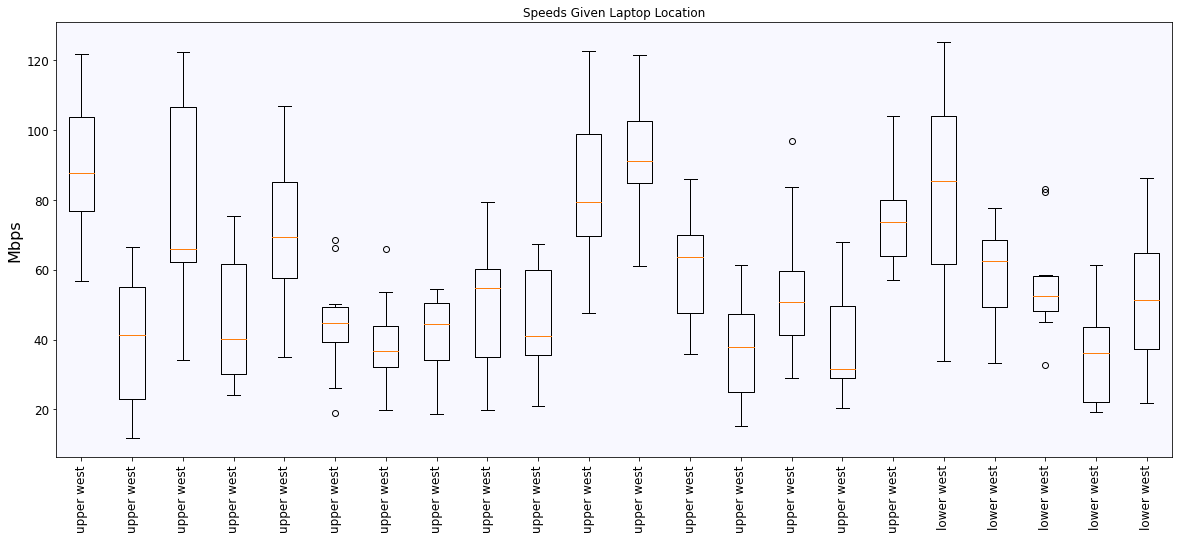

In [10]:
M.plot_results(loc_df[['upper west', 'lower west']], "Laptop Location")

The data is noisy. First I have some "good luck" with speeds even though I'm in the upper west room and the router is in the living room (downstairs), but then the speeds decrease and I move the router to the hallway upstairs (where it lives now) and speeds improve initially but decrease as well. 

Despite the smaller number of tests in the lower west room (where I work), I get a significant decrease of speeds by moving the router to the hallway upstairs.

In [11]:
df_long[df_long['location'].isin(['upper west', 'lower west'])]\
    .sort_values(by=['location','test'], ascending=[False, True])

,test,day,location,computer,router_location,data
3,4,2020-06-07,upper west,HP ProBook 450 G5,living room west corner,"{'time': ['14:09:46', '14:11:36', '14:16:51', ..."
5,6,2020-06-09,upper west,HP ProBook 450 G5,living room west corner,"{'time': ['18:19:50', '18:24:21', '18:28:50', ..."
6,7,2020-06-10,upper west,HP ProBook 450 G5,living room west corner,"{'time': ['10:29:54', '10:32:24', '10:33:27', ..."
7,8,2020-06-10,upper west,HP ProBook 4530s,living room west corner,"{'time': ['11:06:16', '11:07:59', '11:11:08', ..."
10,11,2020-06-10,upper west,HP ProBook 450 G5,living room west corner,"{'time': ['19:10:53', '19:12:59', '19:13:24', ..."
11,12,2020-06-11,upper west,HP ProBook 4530s,living room west corner,"{'time': ['10:01:30', '10:03:46', '10:05:48', ..."
14,15,2020-06-11,upper west,HP ProBook 4530s,living room west corner,"{'time': ['14:33:51', '14:38:11', '14:40:45', ..."
16,17,2020-06-11,upper west,Inspiron 13-5378,living room west corner,"{'time': ['20:38:44', '20:41:07', '20:45:26', ..."
17,18,2020-06-12,upper west,HP ProBook 4530s,living room west corner,"{'time': ['20:32:08', '20:35:44', '20:38:53', ..."
19,20,2020-06-13,upper west,Inspiron 13-5378,living room west corner,"{'time': ['12:14:38', '12:15:51', '12:20:27', ..."



## Computer

All this is of cousre confounded by the old vs new laptops, which as you'd expect, show the clearest signals.

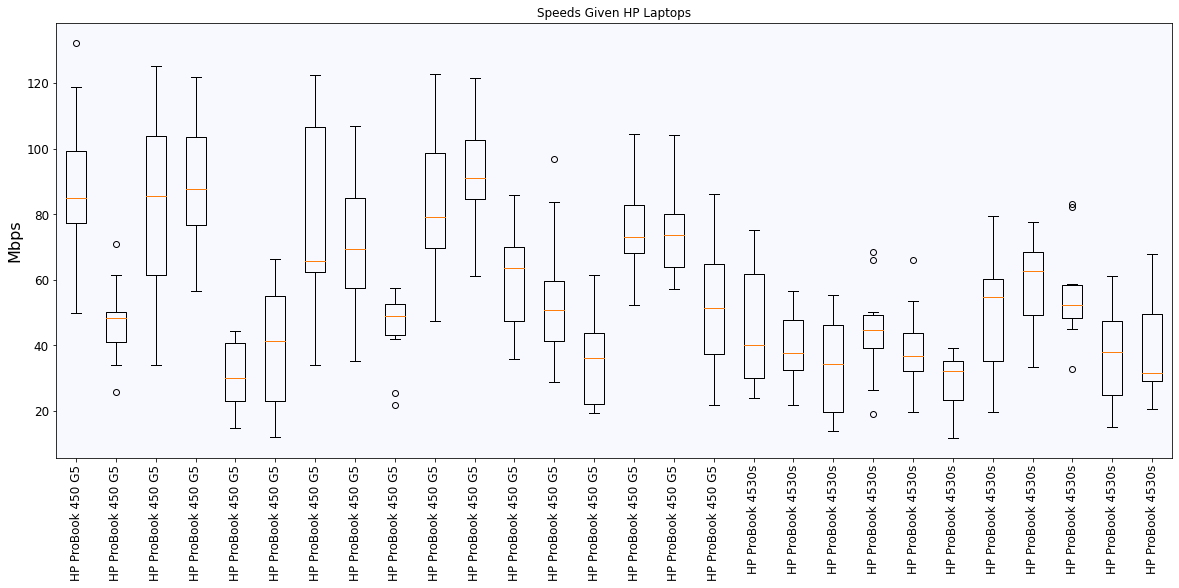

In [12]:
# HP laptops
comp_df = M.transform_data(df_wide, "computer")
M.plot_results(comp_df[['HP ProBook 450 G5', 'HP ProBook 4530s']], "HP Laptops")

The newer HP ProBook gets greater speeds but also has its bad moments and greater variance than I'd have hoped for.

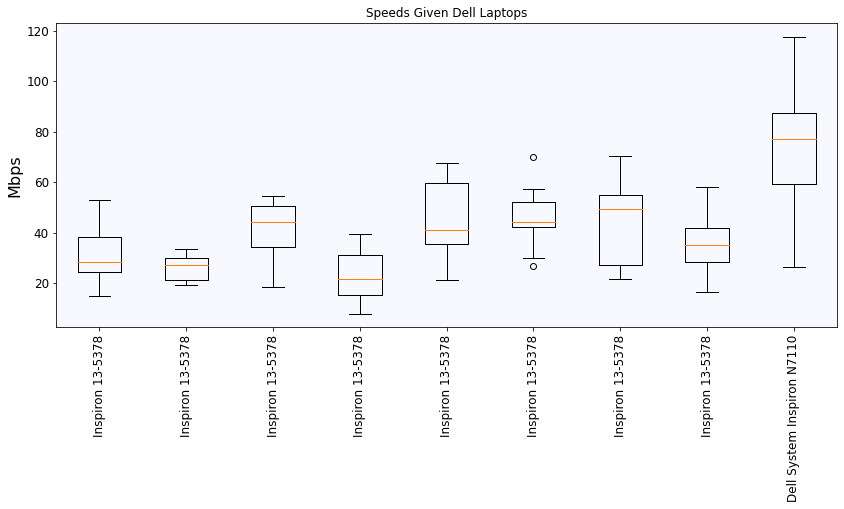

In [13]:
# Dell laptops
M.plot_results(comp_df[['Inspiron 13-5378', 'Dell System Inspiron N7110']], "Dell Laptops", scale=.7)

*Statistics* vs *common sense*:
- I was mostly concerned about speeds for the old Dell so I did not test the new Dell more than once, which is statistically unsound but makes sense, I did not need more than one test to confirm what I knew and was experiencing. I also had less access to these computers.

---